# Linear Regression

### Objective of supervised Learning
    
    - we want to generate a function or hypothesis from training data using some algorithm and then from the function we can predict the output for our test data.
    
    -
### Objective of linear Regression
    - let the function be a type of linear function i.e for vector x(x1,x2,x3,.....,xn) we have function as 
        - f(x) = a(x1) + b(x2)+ c(x3)...............+ alpha(xn) + constant
        
    - now we have to chose (a,b,c,d,.......,alpha) in such a way we predict as closely as possible to real outcome
    - for that we defined our error/cost function as in figure and our goal is to minimize it : -
    - here let data be univariate
    - cost function is convex function so local minima is global minima.

![](images/linearRegressionGoal.png)

## Method 1  (minimizing error function equating differentiation to 0 and finding slope and intercept by solving two equations)

    -  using formulas done by the calculating  slope and intercept value 
    -  for slope and intercept we minimize the error function using differentiation
```python
    - slope = cov(x,y)/cov(x,x)
    - intercept = E(y) - slope*E(x)  
```

    cov(x,y) = E(xy) - E(x)E(y) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('Datasets/linearX.csv')
Y = pd.read_csv('Datasets/linearY.csv')

In [3]:
X = X.values
Y = Y.values

In [4]:
X.shape

(99, 1)

In [5]:
Y.shape

(99, 1)

# Visualization and Normalization/Standarization

In [6]:
%matplotlib inline

In [7]:
plt.style.use('seaborn') #just changing graph style

In [8]:
# normalization/standarization of Data 
X  = (X-np.mean(X))/np.std(X)

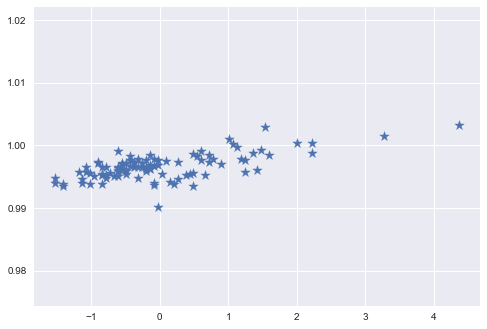

In [9]:
plt.scatter(X,Y,marker='*',s=100)

In [10]:
# using method 1

# theta1
theta1_num = np.mean(X*Y) - np.mean(X)*np.mean(Y)
theta1_den = np.mean(X*X) - np.mean(X)*np.mean(X)
theta1 = theta1_num / theta1_den

# theta0
theta0 = np.mean(Y) - theta1*np.mean(X)

theta1,theta0

(0.0013579397686593838, 0.9966341414141414)

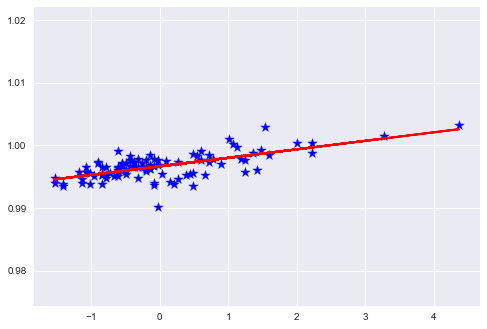

In [11]:
plt.scatter(X,Y,c='blue',marker='*',s=100)
plt.plot(X,theta0+theta1*X, 'r',lw=2)

## Method 2 (gradient descent) (Important)

###### what is Gradient Descent?

- an algorithm to iteratively finding out the minimum value of a convex function by updating parameters in such a way that we move toward the minimum point .

- Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient(slope) (or approximate gradient) of the function at the current point.

In [12]:
X.shape

(99, 1)

In [13]:
Y.shape

(99, 1)

#### steps of gradient descent
    - start from random point (theta0,theta1)
    - update thetas using gradient 
    - move toward minimum till convergence
    

![](images/gradientdescent1.png)

#### convergence criteria

- fixed number of iteration
- change in error < small number(0.001) --> good criteria than above

![](images/Inkedgradientdescent2_jpg.jpg)

In [2]:
# lets do for univariate data 

# my cost function or error is (1/2)*(sigma [(hx-yi)**2] ) 

# see i didn't use m here(or anywhere) since that was just to make calculation simple ,i dont want that!!! :)

In [15]:
def hypothesis(X,theta):
    return theta[0] + theta[1]*X

In [16]:
def gradient(X,Y,theta):
    
    grad = np.zeros(2)
    hx = hypothesis(X,theta) 
    
    grad[0] = np.sum(hx-Y)
    grad[1] = np.sum((hx-Y)*X)

    return grad


def error(X,Y,theta):
    hx = hypothesis(X,theta)
    return (1/2)*(np.sum((hx-Y)**2))

In [17]:
def gradientDescent(X,Y,learning_rate=0.0001):
    
    # starting- point ()
    theta = np.zeros(2)

    # using fixed number of iteration
    itr = 0
    max_itr = 1000
    
    error_list = []
    min_theta = np.zeros(2)
    while itr<max_itr:
        grad = gradient(X,Y,theta)
        error_list.append(error(X,Y,theta))
        theta[0] = theta[0] - learning_rate * grad[0] # grad 0 is d(cost) / d(theta 0)
        theta[1] = theta[1] - learning_rate * grad[1] # grad 1 is d(cost) / d(theta 1)
        
        min_theta[0],min_theta[1] = theta[0],theta[1]
        itr += 1
        
    return min_theta,error_list

In [18]:
theta_ans,error_list = gradientDescent(X,Y)

In [19]:
theta_ans

array([0.99658654, 0.00135787])

In [20]:
# generating testing data
X_test = np.linspace(-2,5,50) 

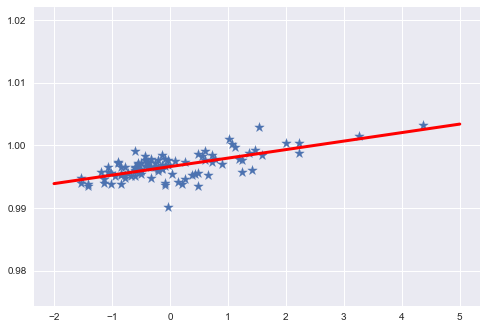

In [21]:
plt.scatter(X,Y, marker = '*',s=100)
plt.plot(X_test, hypothesis(X_test, theta_ans),'r',lw=3)
plt.show()

(0, 400)

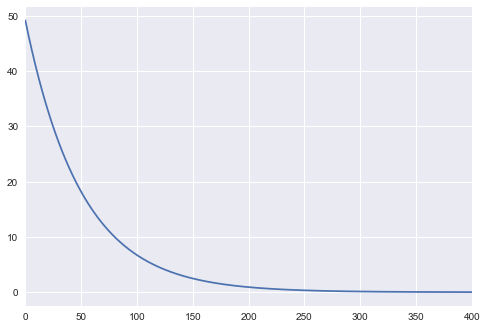

In [22]:
# plotting error function vs iteration
plt.plot(error_list)
plt.xlim(0,400)

In [23]:
def gradientDescent_2(X,Y,learning_rate=0.0001):
    
    # starting- point ()
    theta = np.array([-3.0,3.0])

    # using change in error being very low
    error_list = []
    error_list.append(error(X,Y,theta))
    min_theta = np.zeros(2)
    
    # theta_list for plotting trajectory
    theta_list=[]
    while True:
        grad = gradient(X,Y,theta)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0] # grad 0 is d(cost) / d(theta 0)
        theta[1] = theta[1] - learning_rate * grad[1] # grad 1 is d(cost) / d(theta 1)
        error_temp = error(X,Y,theta)
        change = error_list[-1] - error_temp
        if change < 0.000001:
            break
        error_list.append(error_temp)
        
        min_theta[0],min_theta[1] = theta[0],theta[1]
        
    return min_theta,error_list,theta_list

In [24]:
min_theta, error_list,theta_list = gradientDescent_2(X,Y)

In [25]:
min_theta

array([0.99582637, 0.00196401])

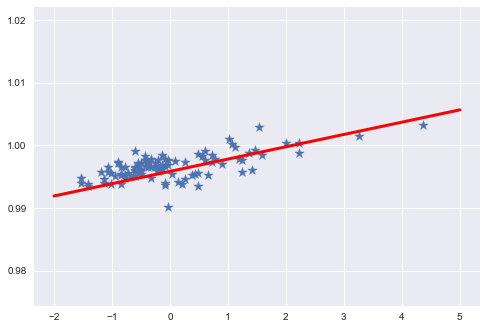

In [26]:
plt.scatter(X,Y, marker = '*',s=100)
plt.plot(X_test, hypothesis(X_test, min_theta),'r',lw=3)
plt.show()

(0, 400)

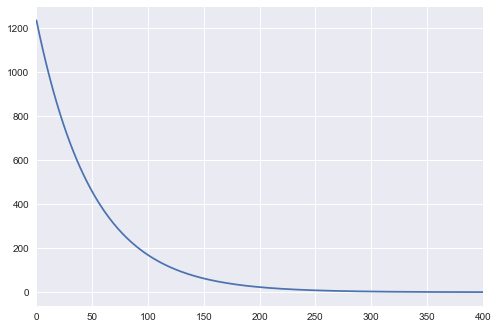

In [27]:
plt.plot(error_list)
plt.xlim(0,400)

# Visualizing the error function in 3D space and the trajectory of theta vector

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [29]:
# importing data

import numpy as np
import pandas as pd

X = pd.read_csv('Datasets/linearX.csv')
Y = pd.read_csv('Datasets/linearY.csv')
X = X.values
Y = Y.values
X  = (X-np.mean(X))/np.std(X)


# creating data for Theta0 and theta1 and computing cost function
T0 = np.linspace(-4,4,X.shape[0])
T1 = np.linspace(-4,4,X.shape[0])

J = np.array([[0 for j in range(X.shape[0])]for i in range(X.shape[0])])
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        J[i][j] = np.sum((T0[i] + T1[j]*X - Y)**2)
T0,T1 = np.meshgrid(T0,T1)        

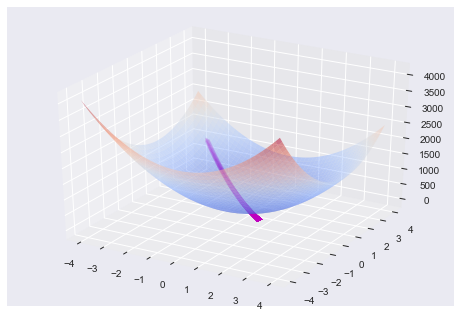

In [30]:
# creating 3d figure and axes
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(T0,T1,J,cmap = 'coolwarm',alpha=0.5)

theta_list = np.array(theta_list)

# trajectory in black
ax.scatter(theta_list[:,0], theta_list[:,1], error_list, marker='>', c='m')

# Creating plot, 3D/2D contour,surface, wireframe


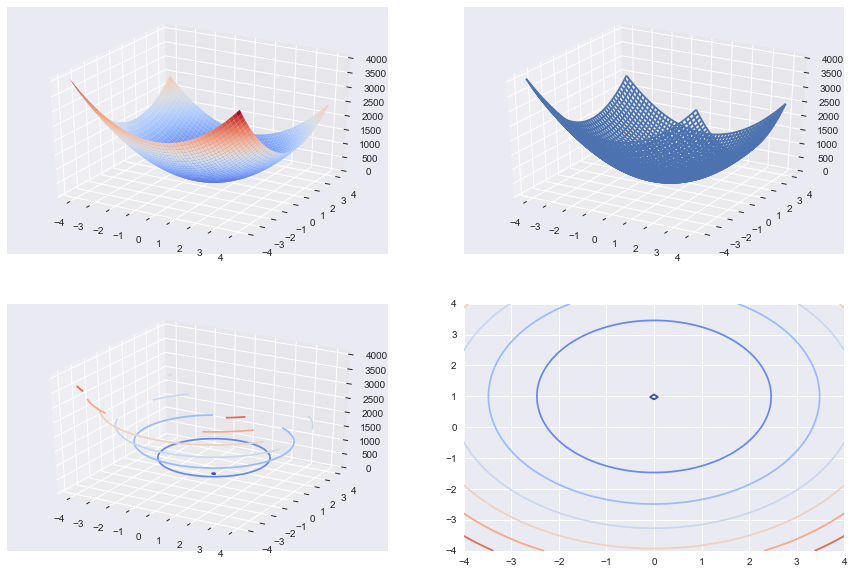

In [31]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(221,projection='3d')
ax = ax.plot_surface(T0,T1,J,cmap = 'coolwarm')

ax1 = plt.subplot(222,projection='3d')
ax1 = ax1.plot_wireframe(T0,T1,J,cmap = 'coolwarm')

ax2 = plt.subplot(223,projection='3d')
ax2 = ax2.contour(T0,T1,J,cmap = 'coolwarm')

ax3 = plt.subplot(224)
ax3 = ax3.contour(T0,T1,J,cmap = 'coolwarm')



## Gradient Descent algo in sklearn